In [1]:
import numpy as np
import pandas as pd
import mikeio
from mikeio.dutil import Dataset, ItemInfo
from mikeio.eum import EUMType, EUMUnit


nt = 100
d1 = np.zeros([nt, 100, 30]) + 1.5
d2 = np.zeros([nt, 100, 30]) + 2.0

d1[0, 10, :] = 2.0
d2[0, 10, :] = 3.0
data = [d1, d2]

time = list(pd.date_range(start="2001-01-01",periods=nt,freq="H"))
items = [ItemInfo("Foo",EUMType.Water_Depth), ItemInfo("Bar",EUMType.Darcy_Velocity)]
ds = Dataset(data, time, items)
ds

DataSet(data, time, items)
Number of items: 2
Shape: (100, 100, 30)
2001-01-01 00:00:00 - 2001-01-05 03:00:00

# Convert to Xarray dataset

*Requires [xarray](http://xarray.pydata.org/en/stable/) to be installed, since this is not a direct dependancy of mikeio*

In [2]:
xds = ds.to_xarray()
xds

<xarray.Dataset>
Dimensions:  (t: 100, x: 30, y: 100)
Coordinates:
  * t        (t) datetime64[ns] 2001-01-01 ... 2001-01-05T03:00:00
Dimensions without coordinates: x, y
Data variables:
    Foo      (t, y, x) float64 1.5 1.5 1.5 1.5 1.5 1.5 ... 1.5 1.5 1.5 1.5 1.5
    Bar      (t, y, x) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0

In [3]:
xds.to_netcdf("test.nc")

In [4]:
xds.sel(t="2001-01-05 00:00")

<xarray.Dataset>
Dimensions:  (x: 30, y: 100)
Coordinates:
    t        datetime64[ns] 2001-01-05
Dimensions without coordinates: x, y
Data variables:
    Foo      (y, x) float64 1.5 1.5 1.5 1.5 1.5 1.5 ... 1.5 1.5 1.5 1.5 1.5 1.5
    Bar      (y, x) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0 2.0

## Dfs2

In [5]:
ds = mikeio.read("../tests/testdata/gebco_sound.dfs2")
ds

DataSet(data, time, items)
Number of items: 1
Shape: (1, 264, 216)
2020-05-15 11:04:52 - 2020-05-15 11:04:52

In [6]:
ds['Elevation'][0,0,0]

-31.0

In [7]:
xds = ds.to_xarray()
xds

<xarray.Dataset>
Dimensions:    (lat: 264, lon: 216)
Coordinates:
  * lon        (lon) float64 12.2 12.21 12.21 12.21 ... 13.09 13.09 13.09 13.1
  * lat        (lat) float64 56.3 56.29 56.29 56.29 ... 55.21 55.21 55.21 55.2
Data variables:
    Elevation  (lat, lon) float64 -31.0 -30.0 -31.0 -31.0 ... -37.0 -38.0 -38.0

In [8]:
xds.Elevation[0,0]

<xarray.DataArray 'Elevation' ()>
array(-31.)
Coordinates:
    lon      float64 12.2
    lat      float64 56.3
Attributes:
    name:     Elevation
    units:    meter
    eumType:  EUMType.Total_Water_Depth
    eumUnit:  EUMUnit.meter

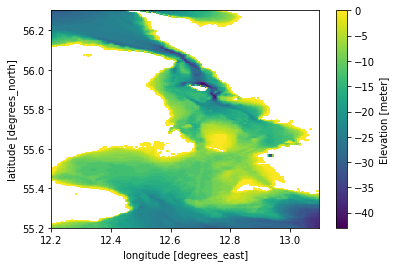

In [9]:
xds.Elevation.plot()

In [10]:
elev = xds.Elevation

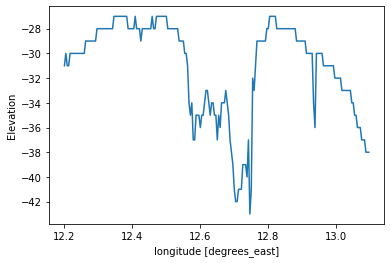

In [11]:
elev.min(dim="lat").plot()

# Clean up

In [12]:
import os
os.remove("test.nc")